# Ejercicio: Análisis de Regresión con el Dataset Wine Quality

## Descripción del Dataset

El dataset **Wine Quality** contiene resultados de análisis fisicoquímicos de vinos portugueses "Vinho Verde" y su calidad evaluada por expertos. El objetivo es predecir la calidad del vino basándose en sus propiedades químicas.

### Variables del dataset:
- **fixed acidity**: Acidez fija (g/L de ácido tartárico)
- **volatile acidity**: Acidez volátil (g/L de ácido acético)
- **citric acid**: Ácido cítrico (g/L)
- **residual sugar**: Azúcar residual (g/L)
- **chlorides**: Cloruros (g/L de cloruro de sodio)
- **free sulfur dioxide**: Dióxido de azufre libre (mg/L)
- **total sulfur dioxide**: Dióxido de azufre total (mg/L)
- **density**: Densidad (g/cm³)
- **pH**: pH del vino
- **sulphates**: Sulfatos (g/L de sulfato de potasio)
- **alcohol**: Contenido de alcohol (% vol)
- **quality**: Calidad del vino (puntuación de 0-10) - **Variable objetivo**

En este ejercicio, trabajarás con el dataset de vinos tintos y aplicarás diferentes técnicas de regresión para predecir la calidad del vino.

## 1. Importar librerías y cargar datos

In [2]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar seed para reproducibilidad
np.random.seed(42)

In [3]:
# Cargar el dataset de vinos tintos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
wine_data = pd.read_csv(url, sep=';')

print("Dataset cargado exitosamente!")
print(f"Dimensiones del dataset: {wine_data.shape}")
print(f"\nColumnas del dataset:")
print(wine_data.columns.tolist())

Dataset cargado exitosamente!
Dimensiones del dataset: (1599, 12)

Columnas del dataset:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


## 2. Análisis Exploratorio de Datos (EDA)

### Ejercicio 2.1: Exploración inicial
Completa el análisis exploratorio inicial del dataset.

In [4]:
# Mostrar las primeras filas del dataset
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Muestra la información general del dataset (tipos de datos, valores no nulos)
print("Información general del dataset:\n")
wine_data.info()


Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# Calcula y muestra las estadísticas descriptivas del dataset
print("Estadísticas descriptivas del dataset:")
wine_data.describe()

Estadísticas descriptivas del dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# Verifica si hay valores nulos en el dataset
print("Valores nulos por columna:\n")
print(wine_data.isnull().sum()) 

Valores nulos por columna:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Ejercicio 2.2: Análisis de la variable objetivo

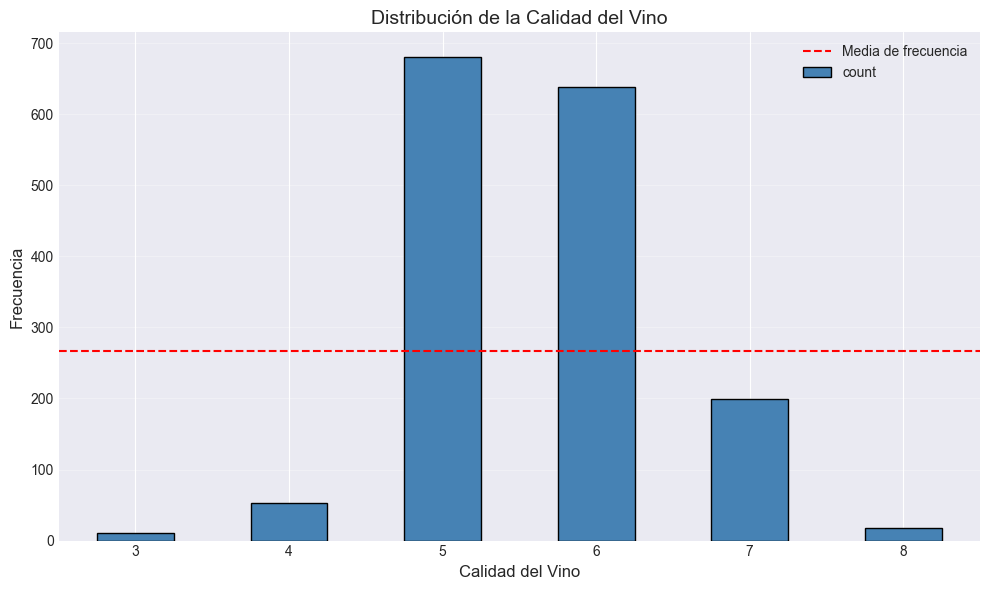

Estadísticas de la calidad del vino:
Media: 5.64
Mediana: 6.00
Desviación estándar: 0.81


In [8]:
# Analizar la distribución de la calidad del vino
plt.figure(figsize=(10, 6))
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Calidad del Vino', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Distribución de la Calidad del Vino', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)

# Agregar estadísticas
mean_quality = wine_data['quality'].mean()
median_quality = wine_data['quality'].median()
plt.axhline(y=wine_data['quality'].value_counts().mean(), color='red', 
            linestyle='--', label=f'Media de frecuencia')

plt.legend()
plt.tight_layout()
plt.show()

print(f"Estadísticas de la calidad del vino:")
print(f"Media: {mean_quality:.2f}")
print(f"Mediana: {median_quality:.2f}")
print(f"Desviación estándar: {wine_data['quality'].std():.2f}")

### Ejercicio 2.3: Matriz de correlación

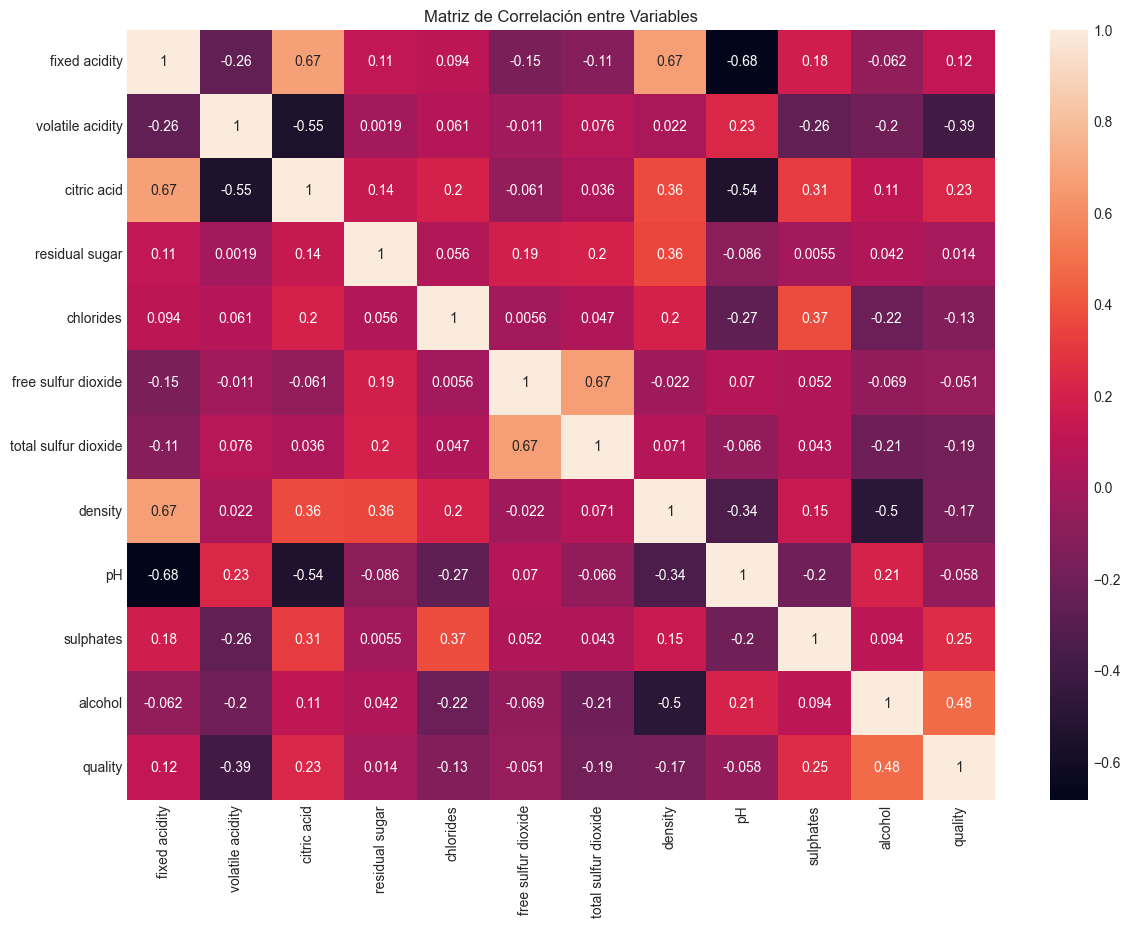

In [9]:
# Calcula la matriz de correlación y visualízala con un heatmap
# Pista: Usa sns.heatmap() con annot=True para mostrar los valores
matrizCorr = wine_data.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(matrizCorr, annot=True)
plt.title("Matriz de Correlación entre Variables")
plt.show()


In [10]:
# Identifica y muestra las 5 variables más correlacionadas con 'quality'
correlaciones = matrizCorr['quality'].sort_values(ascending=False)

print("Correlaciones con la variable 'quality':\n")
print(correlaciones)

topCorr = correlaciones.drop('quality').abs().sort_values(ascending=False).head(5) #O sin abs() para quitar lo de absoluto
print("\n\nTop 5 variables más correlacionadas con la calidad del vino:\n")
print(topCorr)


Correlaciones con la variable 'quality':

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


Top 5 variables más correlacionadas con la calidad del vino:

alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
Name: quality, dtype: float64


### Ejercicio 2.4: Visualización de relaciones

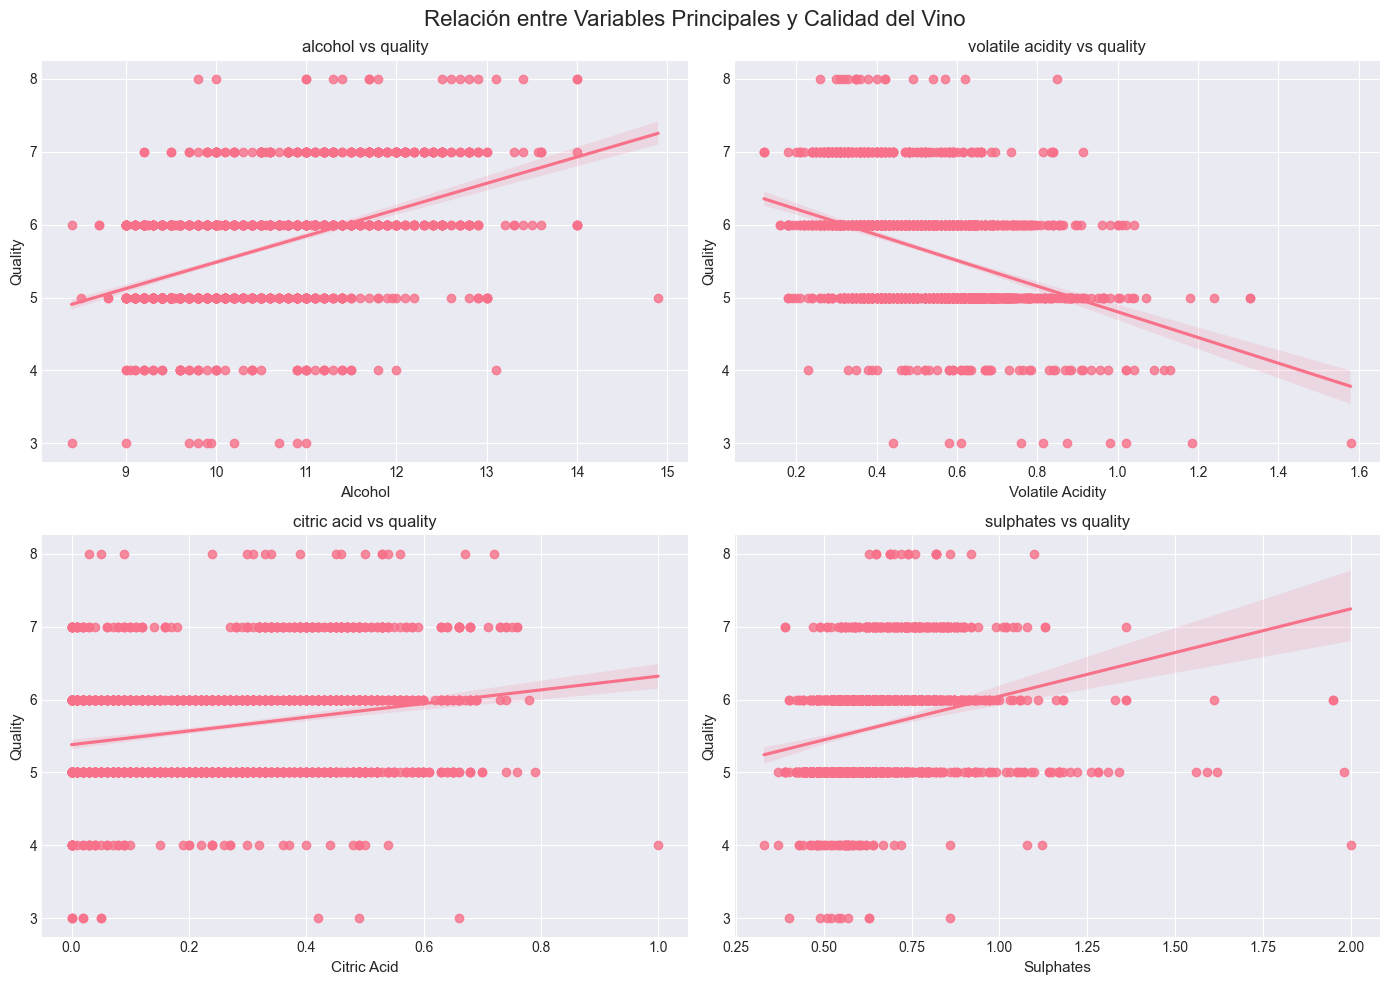

In [11]:
# Visualizar las 4 variables más correlacionadas con quality
top_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relación entre Variables Principales y Calidad del Vino', fontsize=16)

for idx, (ax, feature) in enumerate(zip(axes.flat, top_features)):
    # Crea un scatter plot para cada variable vs quality
    # Agrega una línea de tendencia
    sns.regplot(
        data=wine_data, x=feature, y='quality',
        ax=ax
    )
    ax.set_xlabel(feature.title(), fontsize=11)
    ax.set_ylabel('Quality', fontsize=11)
    ax.set_title(f'{feature} vs quality', fontsize=12)
    pass

plt.tight_layout()
plt.show()

## 3. Preparación de Datos

In [12]:
# Separar características (X) y variable objetivo (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"\nCaracterísticas: {X.columns.tolist()}")

Forma de X: (1599, 11)
Forma de y: (1599,)

Características: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [13]:
# Divide los datos en conjuntos de entrenamiento y prueba
# Usa test_size=0.2 y random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"Tamaño de entrenamiento: X={X_train.shape}, y={y_train.shape}")
print(f"\nTamaño de prueba: X={X_test.shape},  y={y_test.shape}")    

Tamaño de entrenamiento: X=(1279, 11), y=(1279,)

Tamaño de prueba: X=(320, 11),  y=(320,)


In [14]:
# Estandariza las características
# Recuerda: ajusta el scaler solo con los datos de entrenamiento

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Validación Cruzada para Selección de Hiperparámetros

La validación cruzada es fundamental para seleccionar los mejores hiperparámetros sin usar el conjunto de prueba.

### Ejercicio 4.1: Implementación manual de validación cruzada

In [15]:
# Ejemplo: Validación cruzada manual para Ridge
def manual_cross_validation(X, y, alpha, n_folds=5):
    """
    Implementa validación cruzada manualmente para Ridge regression
    """
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kf.split(X):
        # Dividir datos
        X_train_cv, X_val_cv = X[train_idx], X[val_idx]
        y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]
        
        # Estandarizar
        scaler_cv = StandardScaler()
        X_train_cv_scaled = scaler_cv.fit_transform(X_train_cv)
        X_val_cv_scaled = scaler_cv.transform(X_val_cv)
        
        # Entrenar modelo
        model = Ridge(alpha=alpha)
        model.fit(X_train_cv_scaled, y_train_cv)
        
        # Evaluar
        y_pred = model.predict(X_val_cv_scaled)
        rmse = np.sqrt(mean_squared_error(y_val_cv, y_pred))
        scores.append(rmse)
    
    return np.mean(scores), np.std(scores)

# Probar diferentes valores de alpha
alphas_to_test = [0.001, 0.01, 0.1, 1, 10, 100]
cv_results_manual = []

print("Validación Cruzada Manual para Ridge Regression:")
print("-" * 50)

for alpha in alphas_to_test:
    mean_rmse, std_rmse = manual_cross_validation(X_train.values, y_train, alpha)
    cv_results_manual.append({'alpha': alpha, 'mean_rmse': mean_rmse, 'std_rmse': std_rmse})
    print(f"Alpha: {alpha:7.3f} | RMSE: {mean_rmse:.4f} (+/- {std_rmse:.4f})")

# Identifica el mejor alpha basado en el RMSE medio más bajo
best = min(cv_results_manual, key=lambda d: d['mean_rmse'])
best_alpha = best['alpha']
print(f"Mejor alpha: {best_alpha}")

Validación Cruzada Manual para Ridge Regression:
--------------------------------------------------
Alpha:   0.001 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.010 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   0.100 | RMSE: 0.6618 (+/- 0.0136)
Alpha:   1.000 | RMSE: 0.6617 (+/- 0.0136)
Alpha:  10.000 | RMSE: 0.6612 (+/- 0.0135)
Alpha: 100.000 | RMSE: 0.6599 (+/- 0.0139)
Mejor alpha: 100


### Ejercicio 4.2: Usar RidgeCV para validación cruzada automática

In [16]:
# Usa RidgeCV para encontrar automáticamente el mejor alpha
# Pista: RidgeCV tiene un parámetro 'alphas' y 'cv'

alphas = np.logspace(-3, 3, 100)  # 100 valores entre 0.001 y 1000
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print(f"Mejor alpha encontrado por RidgeCV: {ridge_cv.alpha_}")

Mejor alpha encontrado por RidgeCV: 81.11308307896873


### Ejercicio 4.3: GridSearchCV para búsqueda exhaustiva

In [17]:
# Ejemplo completo con GridSearchCV para Ridge
from sklearn.model_selection import GridSearchCV

# Definir parámetros a buscar
param_grid_ridge = {
    'alpha': np.logspace(-3, 3, 20)  # 20 valores entre 0.001 y 1000
}

# Crear modelo base
ridge_base = Ridge(random_state=42)

# Implementa GridSearchCV
# Usa cv=5, scoring='neg_mean_squared_error'

grid_search_ridge = GridSearchCV(
    estimator=ridge_base,
    param_grid=param_grid_ridge,
    cv=5,
    scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled, y_train)

print(f"Mejor alpha: {grid_search_ridge.best_params_['alpha']}")
print(f"Mejor score (RMSE): {(-grid_search_ridge.best_score_)**0.5:.4f} ")

Mejor alpha: 54.555947811685144
Mejor score (RMSE): 0.6624 


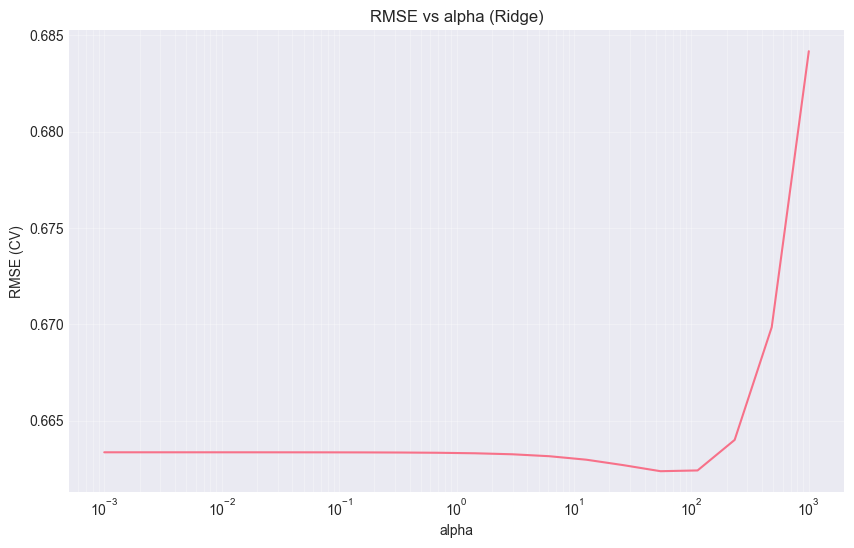

In [18]:
# Visualiza los resultados de la validación cruzada
# Crea un gráfico que muestre cómo cambia el RMSE con diferentes valores de alpha

results = grid_search_ridge.cv_results_
alphas_plot = np.array(results['param_alpha'].tolist(), dtype=float)
rmse_plot = np.sqrt(-results['mean_test_score'])

plt.figure(figsize=(10, 6))
plt.semilogx(alphas_plot, rmse_plot)
plt.xlabel('alpha')
plt.ylabel('RMSE (CV)')
plt.title('RMSE vs alpha (Ridge)')
plt.grid(True, which='both', alpha=0.3)
plt.show()


## 5. Modelos de Regresión

### 5.1 Regresión Lineal Normal

In [19]:
# Implementa y entrena un modelo de regresión lineal

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

#Hacer predicciones
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

#Calcular métricas
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
r2_lr_train = r2_score(y_train, y_pred_lr_train)
r2_lr_test = r2_score(y_test, y_pred_lr_test)

print("Regresión Lineal Normal:\n")
print(f"RMSE Train: {rmse_lr_train:.4f}")
print(f"RMSE Test: {rmse_lr_test:.4f}")
print(f"R2 Train: {r2_lr_train:.4f}")
print(f"R2 Test: {r2_lr_test:.4f}")

Regresión Lineal Normal:

RMSE Train: 0.6513
RMSE Test: 0.6245
R2 Train: 0.3480
R2 Test: 0.4032


### 5.2 Ridge Regression con mejor alpha de CV

In [20]:
# Entrena Ridge con el mejor alpha encontrado por validación cruzada

best_alpha_ridge = ridge_cv.alpha_  # Usa el mejor alpha de la sección anterior
ridge_model = Ridge(alpha=best_alpha_ridge, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

# Predicciones y métricas
y_pred_ridge_train = ridge_model.predict(X_train_scaled)
y_pred_ridge_test = ridge_model.predict(X_test_scaled)

rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

print("Ridge con mejor alpha de CV:\n")
print(f"Alpha: {best_alpha_ridge:.6f}")
print(f"RMSE Train: {rmse_ridge_train:.4f}")
print(f"RMSE Test: {rmse_ridge_test:.4f}")
print(f"R2 Train: {r2_ridge_train:.4f}")
print(f"R2 Test: {r2_ridge_test:.4f}")

Ridge con mejor alpha de CV:

Alpha: 81.113083
RMSE Train: 0.6519
RMSE Test: 0.6262
R2 Train: 0.3469
R2 Test: 0.4001


### 5.3 Lasso Regression con validación cruzada

In [21]:
# Implementa LassoCV para encontrar el mejor alpha automáticamente

alphas_lasso = np.logspace(-3, 1, 100)
lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train_scaled, y_train)

print(f"Mejor alpha para Lasso: {lasso_cv.alpha_}\n")
print(f"Número de características seleccionadas: {(lasso_cv.coef_ != 0).sum()}\n")

# Predicciones y métricas
y_pred_lasso_train = lasso_cv.predict(X_train_scaled)
y_pred_lasso_test = lasso_cv.predict(X_test_scaled)

rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

print("Lasso:")
print(f"RMSE Train: {rmse_lasso_train:.4f}")
print(f"RMSE Test: {rmse_lasso_test:.4f}")
print(f"R2 Train: {r2_lasso_train:.4f}")
print(f"R2 Test: {r2_lasso_test:.4f}")

Mejor alpha para Lasso: 0.008497534359086447

Número de características seleccionadas: 8

Lasso:
RMSE Train: 0.6522
RMSE Test: 0.6266
R2 Train: 0.3462
R2 Test: 0.3991


In [22]:
# Identifica qué características fueron eliminadas por Lasso
eliminadas = [col for col, c in zip(X.columns, lasso_cv.coef_) if c == 0]
print("Características eliminadas por Lasso:", eliminadas)

Características eliminadas por Lasso: ['citric acid', 'residual sugar', 'density']


## 6. Comparación de Modelos

In [23]:
# Crea una tabla comparativa con todos los modelos
# Incluye: RMSE Train, RMSE Test, R² Train, R² Test, MAE Test

mae_lr_test = mean_absolute_error(y_test, y_pred_lr_test)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)

comparison_data = {
    'Modelo': ['Linear Regression', 'Ridge', 'Lasso'],
    'RMSE Train': [rmse_lr_train, rmse_ridge_train, rmse_lasso_train],
    'RMSE Test':  [rmse_lr_test,  rmse_ridge_test,  rmse_lasso_test],
    'R2 Train':   [r2_lr_train,   r2_ridge_train,   r2_lasso_train],
    'R2 Test':    [r2_lr_test,    r2_ridge_test,    r2_lasso_test],
    'MAE Test':   [mae_lr_test,   mae_ridge_test,   mae_lasso_test]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

              Modelo  RMSE Train  RMSE Test  R2 Train   R2 Test  MAE Test
0  Linear Regression    0.651300   0.624520  0.347993  0.403180  0.503530
1              Ridge    0.651868   0.626152  0.346853  0.400058  0.506280
2              Lasso    0.652170   0.626642  0.346250  0.399117  0.507139


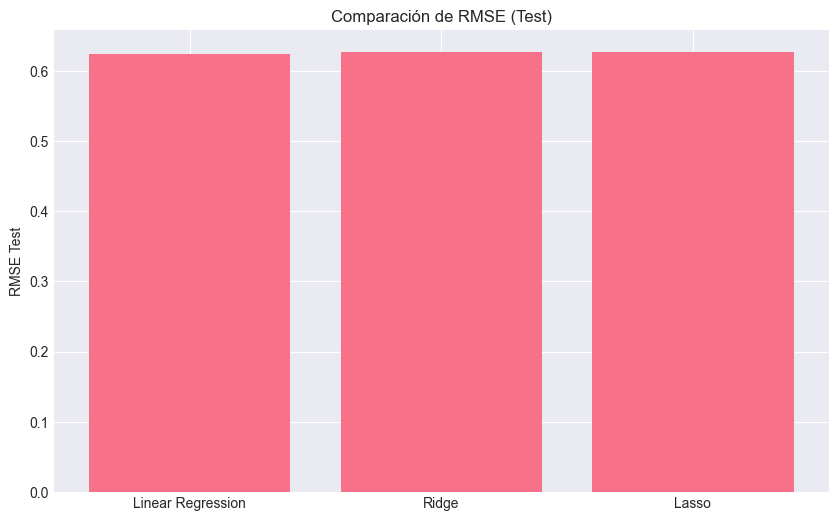

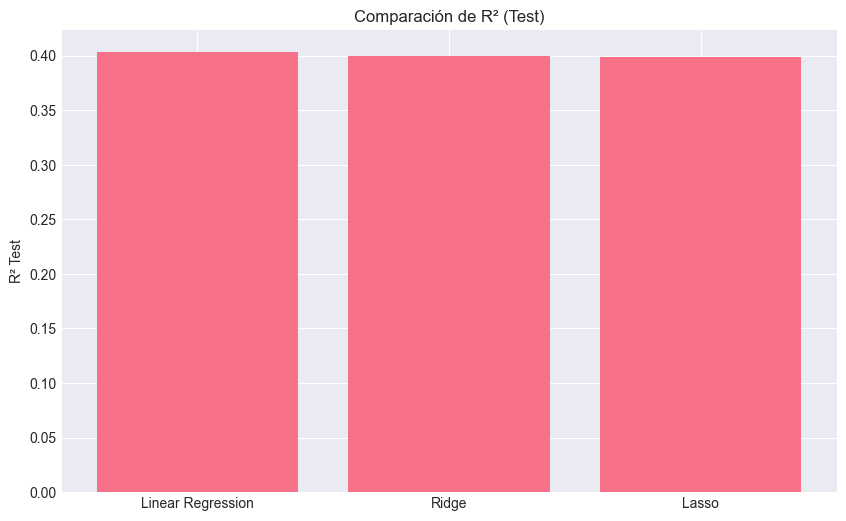

In [24]:
# Crea visualizaciones para comparar los modelos
# 1) Gráfico de barras comparando RMSE (Test)
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Modelo'], comparison_df['RMSE Test'])
plt.ylabel('RMSE Test')
plt.title('Comparación de RMSE (Test)')
plt.show()

# 2) Gráfico de barras comparando R² (Test)
plt.figure(figsize=(10, 6))
plt.bar(comparison_df['Modelo'], comparison_df['R2 Test'])
plt.ylabel('R² Test')
plt.title('Comparación de R² (Test)')
plt.show()


## 7. Análisis de Residuos

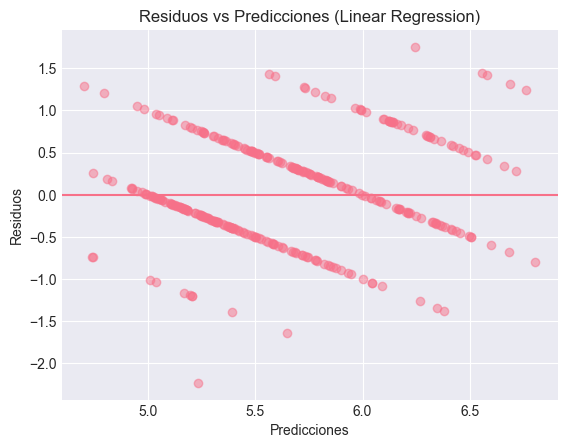

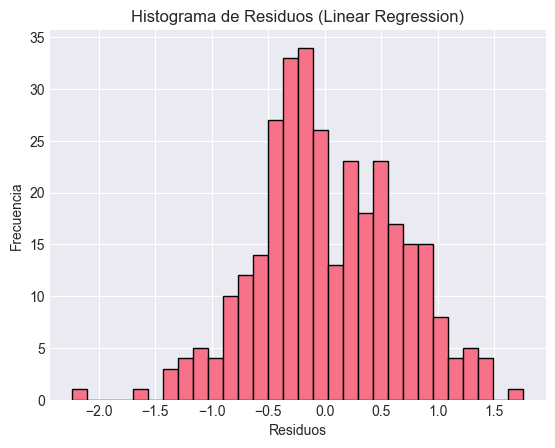

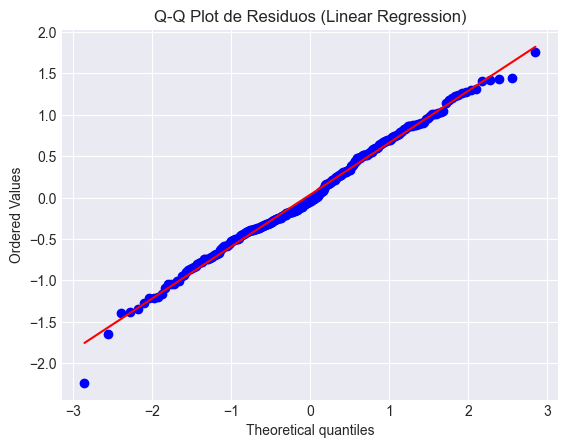

In [25]:
# Para el mejor modelo, crea:

metrics_test = {
    'Linear Regression': rmse_lr_test,
    'Ridge': rmse_ridge_test,
    'Lasso': rmse_lasso_test
}
best_name = min(metrics_test, key=metrics_test.get)

# predicciones de test del mejor modelo
preds_test = {
    'Linear Regression': y_pred_lr_test,
    'Ridge': y_pred_ridge_test,
    'Lasso': y_pred_lasso_test
}[best_name]

residuals = y_test - preds_test

# 1) Gráfico de residuos vs predicciones
plt.figure()
plt.scatter(preds_test, residuals, alpha=0.5)
plt.axhline(0)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title(f'Residuos vs Predicciones ({best_name})')
plt.show()

# 2) Histograma de residuos
plt.figure()
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title(f'Histograma de Residuos ({best_name})')
plt.show()

# 3) Q-Q plot de residuos
plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title(f'Q-Q Plot de Residuos ({best_name})')
plt.show()


## 8. Importancia de Características

<Figure size 1000x800 with 0 Axes>

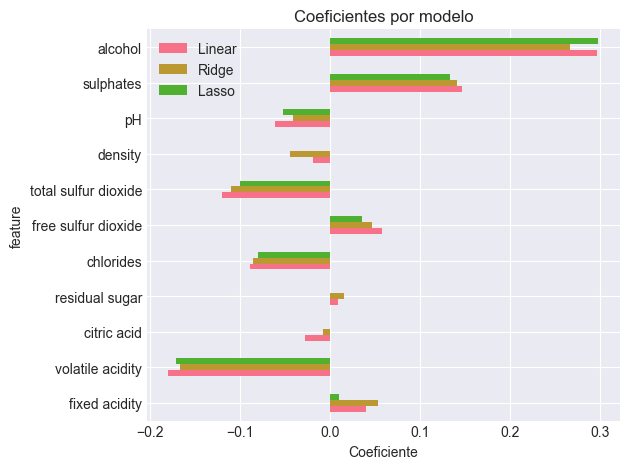

In [26]:
# Visualiza los coeficientes de los tres modelos en un mismo gráfico
# Esto te ayudará a entender qué características son más importantes
coefs_df = pd.DataFrame({
    'feature': X.columns,
    'Linear': lr_model.coef_,
    'Ridge': ridge_model.coef_,
    'Lasso': lasso_cv.coef_
}).set_index('feature')

plt.figure(figsize=(10,8))
coefs_df.plot(kind='barh')
plt.title('Coeficientes por modelo')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()

## 9. Validación Cruzada Final del Mejor Modelo

In [27]:
# Realiza validación cruzada con 10 folds del mejor modelo
# Reporta la media y desviación estándar del RMSE
best_model = {
    'Linear Regression': lr_model,
    'Ridge': ridge_model,
    'Lasso': lasso_cv
}[best_name]

cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X_train_scaled, y_train,
                            cv=cv, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_scores)

print(f"Validación cruzada 10-fold ({best_name})")
print(f"RMSE medio: {rmse_cv.mean():.4f}")
print(f"RMSE std:  {rmse_cv.std():.4f}")

Validación cruzada 10-fold (Linear Regression)
RMSE medio: 0.6600
RMSE std:  0.0321


## 10. Conclusiones y Preguntas de Reflexión

### Preguntas para responder:

1. **¿Cuál modelo tuvo el mejor desempeño? ¿Por qué crees que fue así?**
   - Tu respuesta: 
   El modelo con mejor desempeño fue Linear Regression, con un RMSE de prueba de 0.6245 y un R² de 0.4031. La diferencia con Ridge y Lasso fue mínima porque los datos no presentan fuerte multicolinealidad, por lo que la regularización no aportó ventajas claras.

2. **¿Qué características son las más importantes para predecir la calidad del vino?**
   - Tu respuesta: 
      - Alcohol (coeficiente positivo alto).
      - Sulphates (coeficiente positivo moderado).
      - Volatile acidity (coeficiente negativo relevante).

3. **¿Observas señales de sobreajuste en algún modelo? ¿Cómo lo identificaste?**
   - Tu respuesta:
   No se observan señales claras de sobreajuste. Los valores de RMSE y R² en entrenamiento y prueba son similares. Si hubiera sobreajuste, esperaríamos un R² muy alto en entrenamiento y muy bajo en prueba, lo cual no ocurre.

4. **¿Cómo cambió el rendimiento de Ridge y Lasso con diferentes valores de alpha?**
   - Tu respuesta: 
   El rendimiento fue muy estable: los RMSE apenas variaron al cambiar alpha. Esto confirma que la regularización no tuvo un impacto fuerte en este dataset, probablemente porque la regresión lineal ya estaba ajustando de manera estable.

5. **¿Qué ventajas observaste al usar validación cruzada para seleccionar hiperparámetros?**
   - Tu respuesta: 
      - Evita depender de una sola partición de datos. 
      - Permite estimar de forma más robusta el rendimiento promedio. 
      - Ayuda a elegir el valor de alpha de Ridge y Lasso con base en el desempeño medio y no en un solo conjunto de prueba.

6. **Si Lasso eliminó algunas características, ¿crees que esto mejoró o empeoró el modelo? ¿Por qué?**
   - Tu respuesta: 
   Lasso eliminó citric acid, residual sugar y density, pero el rendimiento fue prácticamente igual. Esto indica que esas variables no aportaban información predictiva relevante. Aunque no mejoró el modelo en métricas, sí lo simplificó.

7. **¿Qué otros pasos podrías tomar para mejorar el rendimiento del modelo?**
   - Tu respuesta: 
      - Probar modelos no lineales. 
      - Generar interacciones entre variables (ejemplo: alcohol × sulphates). 
      - Recolectar más datos o usar técnicas de selección de variables para reducir ruido. 
      - Probar modelos de regresión polinómica si la relación no es estrictamente lineal.

## Ejercicio Extra: Ingeniería de Características

### Desafío:
Intenta mejorar el rendimiento del modelo creando nuevas características:

1. Crea interacciones entre variables (ej: alcohol × pH)
2. Crea características polinomiales
3. Agrupa la calidad en categorías (baja: 3-4, media: 5-6, alta: 7-8) y úsala como característica
4. Crea ratios entre características relacionadas

In [39]:
# Implementa ingeniería de características y evalúa si mejora el modelo
wine_features = wine_data.copy()

wine_features['alcohol_x_pH'] = wine_features['alcohol'] * wine_features['pH']

wine_features['alcohol_squared'] = wine_features['alcohol'] ** 2
wine_features['sulphates_squared'] = wine_features['sulphates'] ** 2

wine_features['quality_cat'] = pd.cut(
    wine_features['quality'],
    bins=[2, 4, 6, 8],
    labels=['baja', 'media', 'alta']
)

wine_features['sulphates_per_alcohol'] = wine_features['sulphates'] / (wine_features['alcohol'] + 1e-6)
wine_features['fixed_per_volatile'] = wine_features['fixed acidity'] / (wine_features['volatile acidity'] + 1e-6)

wine_features = pd.get_dummies(wine_features, columns=['quality_cat'], drop_first=True)

X_new = wine_features.drop('quality', axis=1)
y_new = wine_features['quality']

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_new, y_new, test_size=0.2, random_state=42
)

scaler_new = StandardScaler()
X_train_new_scaled = scaler_new.fit_transform(X_train_new)
X_test_new_scaled = scaler_new.transform(X_test_new)

# Entrenar modelo base (Linear Regression para comparar)
lr_new = LinearRegression()
lr_new.fit(X_train_new_scaled, y_train_new)

# Evaluar
y_pred_train_new = lr_new.predict(X_train_new_scaled)
y_pred_test_new = lr_new.predict(X_test_new_scaled)

rmse_train_new = np.sqrt(mean_squared_error(y_train_new, y_pred_train_new))
rmse_test_new = np.sqrt(mean_squared_error(y_test_new, y_pred_test_new))
r2_train_new = r2_score(y_train_new, y_pred_train_new)
r2_test_new = r2_score(y_test_new, y_pred_test_new)

print("Modelo con Ingeniería de Características:")
print(f"RMSE Train: {rmse_train_new:.4f}")
print(f"RMSE Test: {rmse_test_new:.4f}")
print(f"R2 Train: {r2_train_new:.4f}")
print(f"R2 Test: {r2_test_new:.4f}")

Modelo con Ingeniería de Características:
RMSE Train: 0.4164
RMSE Test: 0.4277
R2 Train: 0.7335
R2 Test: 0.7201
